## word2vec

In this lecture we will try to see how word vectors can improve the  vector represenation of a document

In [31]:

corpus = ["Jhon saw the bus coming",
"John sees the buses approaching",
"Maria watches the coach nearing"]


### Hard represeantion of documents



|      | Jhon | saw  | bus  | coming | John | sees | buses | approaching | Maria | watches | coach | nearing |
| ---- | ---- | ---- | ---- | ------ | ---- | ---- | ----- | ----------- | ----- | ------- | ----- | ------- |
| doc1 | 1    | 1    | 1    | 1      | 0    | 0    | 0     | 0           | 0     | 0       | 0     | 0       |
| doc2 | 0    | 0    | 0    | 0      | 1    | 1    | 1     | 1           | 0     | 0       | 0     | 0       |
| doc3 | 0    | 0    | 0    | 0      | 0    | 0    | 0     | 0           | 1     | 1       | 1     | 1       |

In the above matrix, the three documents seem to be very different, but they convey similar ideas. So, let's lemmatize the docs first and reduce the amount of tokens. 

In [32]:
##  We Need to install a language model first
#!python -m spacy download en_core_web_lg

7209.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [33]:
## We also need to import spacy and load the model we just dowloaded
import spacy

nlp = spacy.load('en_core_web_lg')

In [34]:
## We process the document with proccessing pipeline 'nlp'. We go through each document and convert them into a list of annotated texts. 
docs = [nlp(doc) for doc in corpus]

### We now proceed to extract the lemmas from our annotated documents. A lemma is the form of the word that you find in the dictionary. Lemmatization reduces multiple forms of a word to one. For instance the lemmatizer reduces "went", "gone" to "go". We also take the change to get rid of stop words Stop words are words which are very common but carry little meaning; for instance "the", "of", "a", are stop words. 


In [35]:
lemmatized_corpus = []

for doc in docs:
    lemmatized_list = [t.lemma_ for t in doc if not t.is_stop]
    lemmatized_corpus.append(lemmatized_list)

print(lemmatized_corpus)


[['Jhon', 'see', 'bus', 'come'], ['John', 'see', 'bus', 'approach'], ['Maria', 'watch', 'coach', 'near']]


Now I have a term document matrix (TDM) with fewer words and, therefore, can see some similarities emerging

|      | Jhon | ~~saw~~  | bus*  | come* | John | see* | ~~buses~~ | approach* | Maria | watch* | coach | near* |
| ---- | ---- | ---- | ---- | ------ | ---- | ---- | ----- | ----------- | ----- | ------- | ----- | ------- |
| doc1 | 1    | 0    | 1    | 1      | 0    | 1    | 0     | 0           | 0     | 0       | 0     | 0       |
| doc2 | 0    | 0    | 1    | 0      | 1    | 1    | 0     | 1           | 0     | 0       | 0     | 0       |
| doc3 | 0    | 0    | 0    | 0      | 0    | 0    | 0     | 0           | 1     | 1       | 1     | 1       |

#### But these three docs are more similar than the matrix shows, because:
- John, Jhon, and Maria are PERSONAL NAMES
- the verbs 'come','approach' and 'near', and 'see' and 'watch' have similar meanings
- the nouns bus and coach are synonyms

|      | NAME | PERCEPTION | VEHICLE | VERB(movement) | 
| ---- | ---- | ---- | ---- | ------ | 
| doc1 | 1    | 1   | 1    | 1      | 
| doc2 | 1    | 1    | 1    | 1      | 
| doc3 | 1    | 1    | 1    | 1      |     | 

But this matrix is not perfect neither because it shows our three documents being identical, but they are not.  Here is when word vectors added to the document vector can be helful. 

### word2vec
> The word2vec algorithm uses a neural network model to learn **word associations** from a large corpus of text. Once trained, such a model can **detect synonymous words** or suggest additional words for a partial sentence.  word2vec represents each distinct word with a particular list of numbers called a **vector**. The **vectors** are chosen carefully such that they **capture the semantic and syntactic qualities of words**; as such, a simple mathematical function (cosine similarity) can indicate the level of semantic similarity between the words represented by those vectors. 

![word2vecalgo](https://fasttext.cc/img/cbo_vs_skipgram.png)

> CBOW takes a context of surrounding words as input and tries to predict the target word. For example, given the context "sellling these __ leather jackets", the goal is to predict the target word "fine". In CBOW, the network takes the average of the word vectors of the context words as input and tries to predict the target word.

> Skip-gram, on the other hand, takes a target word as input and tries to predict the context words. For example, given the target word "fine", the goal is to predict the context words "sellling these leather jackets". In Skip-gram, the network takes the target word's vector as input and tries to predict the surrounding context words.

Let use spaCy again to loot at the vector of the word 'queer'.

In [36]:

doc_vec = nlp('queer')

vector = doc_vec[0].vector

print(vector)

[ 0.56448   4.2793   -0.37313  -0.6329   -0.24329   4.2815    3.543
  1.2521   -1.1709    1.4632    1.5757   -1.4775    0.54986   2.558
  2.3112   -1.0085   -0.77477  -0.77927  -3.0723    3.047     0.59854
 -0.56118   0.081339 -6.5437    2.1899    0.48863  -0.86958  -0.8265
  0.54648  -0.6226   -4.3823   -3.9592   -3.0384   -2.1234   -2.8488
  2.5948   -1.388    -6.0594   -0.26     -5.0839   -1.7021   -0.86231
 -3.2109    0.5719   -1.2782    0.61421  -2.3186   -0.57296   2.9423
  5.1486   -4.305     0.64642   0.33949   0.26661  -1.0494   -1.167
 -0.089425  0.80106   2.5772    1.5188   -1.2027    1.5221    0.29338
  1.7862   -3.8811   -0.087173 -1.6824   -3.3513   -0.83147   0.43474
 -4.0362   -0.29637  -1.4015   -0.6127    0.46407  -0.43468  -0.25611
  1.0933    1.1818    2.6712    0.35092   2.1301    5.0566   -2.6372
  6.7565    2.4958   -2.027    -3.2152   -1.1276    0.15799   0.48716
 -3.0721    1.1125    0.44987  -1.9486   -0.91967  -0.025917  0.85293
 -0.24973  -3.3258    0.1931  

And finally let's look at the nearest neighbors in the vector space of the word 'queer'.

In [37]:
## We have to import numpy first because vectors are handled as numerical arrays.
import numpy as np

nb = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings['queer']]]), n=20)
words = [nlp.vocab.strings[w] for w in nb[0][0]]

print(words)

['queer', 'Xueer', 'queerly', 'genderqueer', 'queers', 'lesbian', 'LGBTQ+', 'gay', 'LGBTQIA+', 'LGBTQIA', 'Genderqueer', 'LGBTQI+', 'LGBTQI', 'LGBTQA', 'LGBTQ2', 'LGBTQ', 'queercore', 'LGBT+', 'LGBTs', 'queef']


There exist an implementation of word2vec that produces both word vectors and vertorical representation of the doc. 

In [38]:

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

for i, item in enumerate(corpus):
    vector = model.infer_vector(item.split())
    print("Item ", i, ":", vector)


Item  0 : [-0.03791686 -0.05817032  0.05002084 -0.09284069  0.02735245]
Item  1 : [-0.00832447  0.04497933  0.02326251 -0.06246972 -0.07789601]
Item  2 : [-0.06540559 -0.02823052 -0.08888328 -0.00194886  0.00615782]


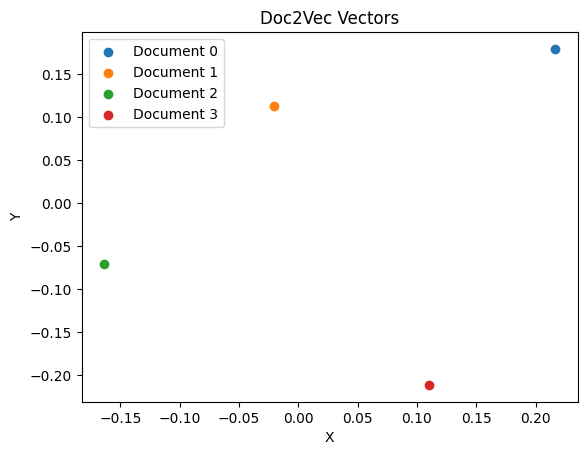

In [39]:
import gensim
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

### I am adding here one more sentence to contrast with the other three
corpus = ["John saw the bus coming",
"John sees the buses approaching",
"Maria watches the coach nearing",
"the Rabbit left without saying anything"]

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

model = Doc2Vec(documents, vector_size=2, window=2, min_count=1, workers=4)

vectors = [model.infer_vector(item.split()) for item in corpus]

fig, ax = plt.subplots()

for i, vector in enumerate(vectors):
    ax.scatter(*vector, label=f"Document {i}")

ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Doc2Vec Vectors")

plt.show()
